<img src="https://www.jamboreeindia.com/lp/assets/image/logo.png" width="1000">

## About Jamboree 📚

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE, or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.

### Business Problem 💡

They recently launched a feature where students/learners can come to their website and check their probability of getting into an Ivy League college. This feature estimates the chances of graduate admission from an Indian perspective.

The company wants to know:
 - What factors are important in graduate admissions.
 - How these factors are interrelated among themselves. 

It will also help predict one's chances of admission given the rest of the variables.

### Dataset 📊

| Feature                                      | Description                                      |
|----------------------------------------------|--------------------------------------------------|
| **Serial No.**                               | Unique row ID                                    |
| **GRE Scores**                               | Scores out of 340                                |
| **TOEFL Scores**                             | Scores out of 120                                |
| **University Rating**                        | Rating out of 5                                  |
| **Statement of Purpose (SOP)**               | Rating out of 5                                  |
| **Letter of Recommendation (LOR)**           | Rating out of 5                                  |
| **Undergraduate GPA**                        | GPA out of 10                                   |
| **Research Experience**                      | Either 0 (no) or 1 (yes)                        |
| **Chance of Admit**                          | Ranging from 0 to 1                              |

- - - - 

#### Importing Required Libraries 🤝

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


import warnings
warnings.filterwarnings('ignore')

#### Read Dataset 🔍

In [2]:
df = pd.read_csv(r'../data/Jamboree_Admission.csv')
df.sample(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
59,60,311,104,2,2.0,2.0,8.30,0,0.42
388,389,296,97,2,1.5,2.0,7.80,0,0.49
410,411,301,96,1,3.0,4.0,7.56,0,0.54
84,85,340,115,5,4.5,4.5,9.45,1,0.94
469,470,326,114,4,4.0,3.5,9.16,1,0.86


In [3]:
print("Shape of the data: ", df.shape)
print("The Given Dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))
print("Columns: ", df.columns.to_list())

Shape of the data:  (500, 9)
The Given Dataset has 500 rows and 9 columns
Columns:  ['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']


### 🕵🏽‍♂️ Shape:

* The dataset comprises 500 rows and 9 columns, representing a volume of data. 
* Each row corresponds to chances of graduate admission from an Indian perspective

### Data Structure 📰

In [4]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


### 🕵🏽‍♂️ Dataset Information:

* **Data Consistency**: All columns have the same non-null count, indicating no missing values in the dataset.
* **Data Types**: Columns are classified into integer and float types.
* **Duplicate**: There is no duplicate rows identified

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df = df.drop(columns=['Serial No.'])

#### 🕵🏽‍♂️ Insights

* **Encoding Categorical Variables**
The only categorical variable is Research (0 or 1), which is already in a numeric format. Therefore, no additional encoding is needed for this variable.

* **Remove Useless Features**
Serial No. column in the dataset doesn't provide significant information to the model. Hence removing the serial no. for the futher analysis.

* **Duplicate Records**
There is no duplicate records found. We are good to proceed

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


### 🕵🏽‍♂️ Descriptive Statistics Insight:
* *GRE scores* range from 290 to 340, with an average score of approximately 316. The distribution is relatively tight, with a standard deviation of 11.295, indicating most scores are close to the mean. The interquartile range (IQR) is from 308 to 325, showing that 50% of the scores fall within this range.
* *TOEFL scores* range from 92 to 120, with an average score of about 107. The standard deviation is 6.082, suggesting that the scores are moderately spread around the mean. The IQR is from 103 to 112, indicating that half of the scores fall within this range.
* *University ratings* range from 1 to 5, with an average rating of approximately 3.114. The standard deviation of 1.144 indicates a moderate spread around the mean. The median rating is 3, and the IQR is from 2 to 4, showing that most ratings are clustered around these values.
* *SOP scores* range from 1 to 5, with an average score of 3.374. The standard deviation is 0.991, indicating a moderate spread. The median score is 3.5, and the IQR is from 2.5 to 4, suggesting that most SOP scores fall within this range.
* *LOR scores* range from 1 to 5, with an average score of 3.484. The standard deviation is 0.925, indicating a moderate spread. The median score is 3.5, and the IQR is from 3 to 4, showing that most LOR scores are within this range.
* *CGPA scores* range from 6.8 to 9.92, with an average score of 8.576. The standard deviation is 0.605, indicating that the scores are relatively close to the mean. The median CGPA is 8.56, and the IQR is from 8.128 to 9.04, showing that most CGPA scores fall within this range.
* *Research variable* is binary (0 or 1), indicating whether a student has research experience. The mean is 0.56, suggesting that 56% of the students have research experience. The standard deviation is 0.497, reflecting the binary nature of the data. The median and IQR indicate that a significant portion of the students have research experience

- - - - 

### Exploratory Data Analysis (EDA) 💹

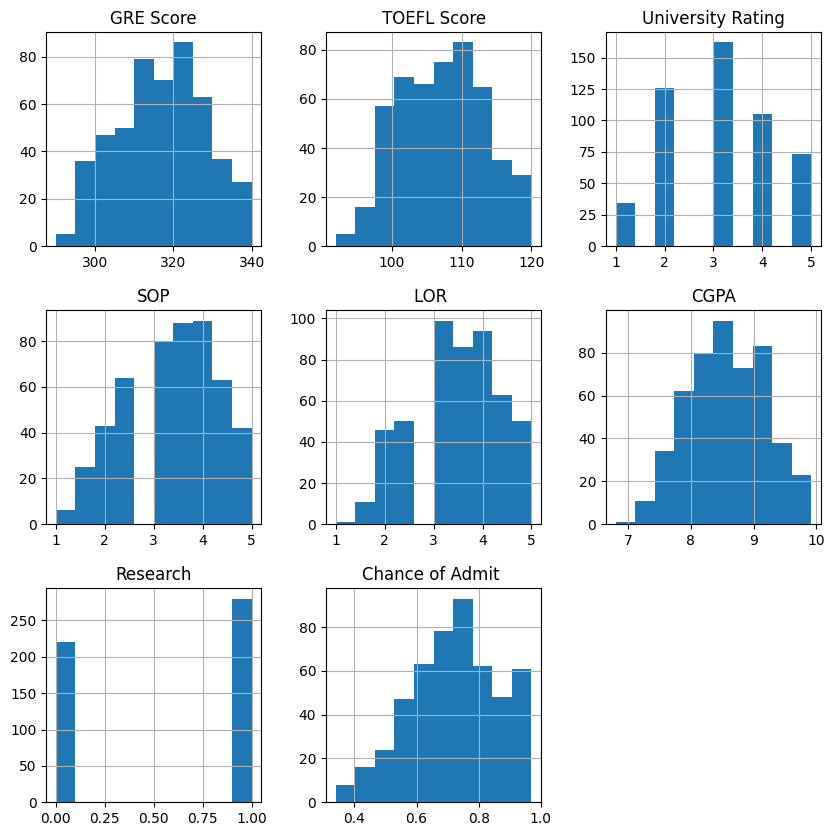

In [9]:
df.hist(figsize=(10, 10))
plt.show()

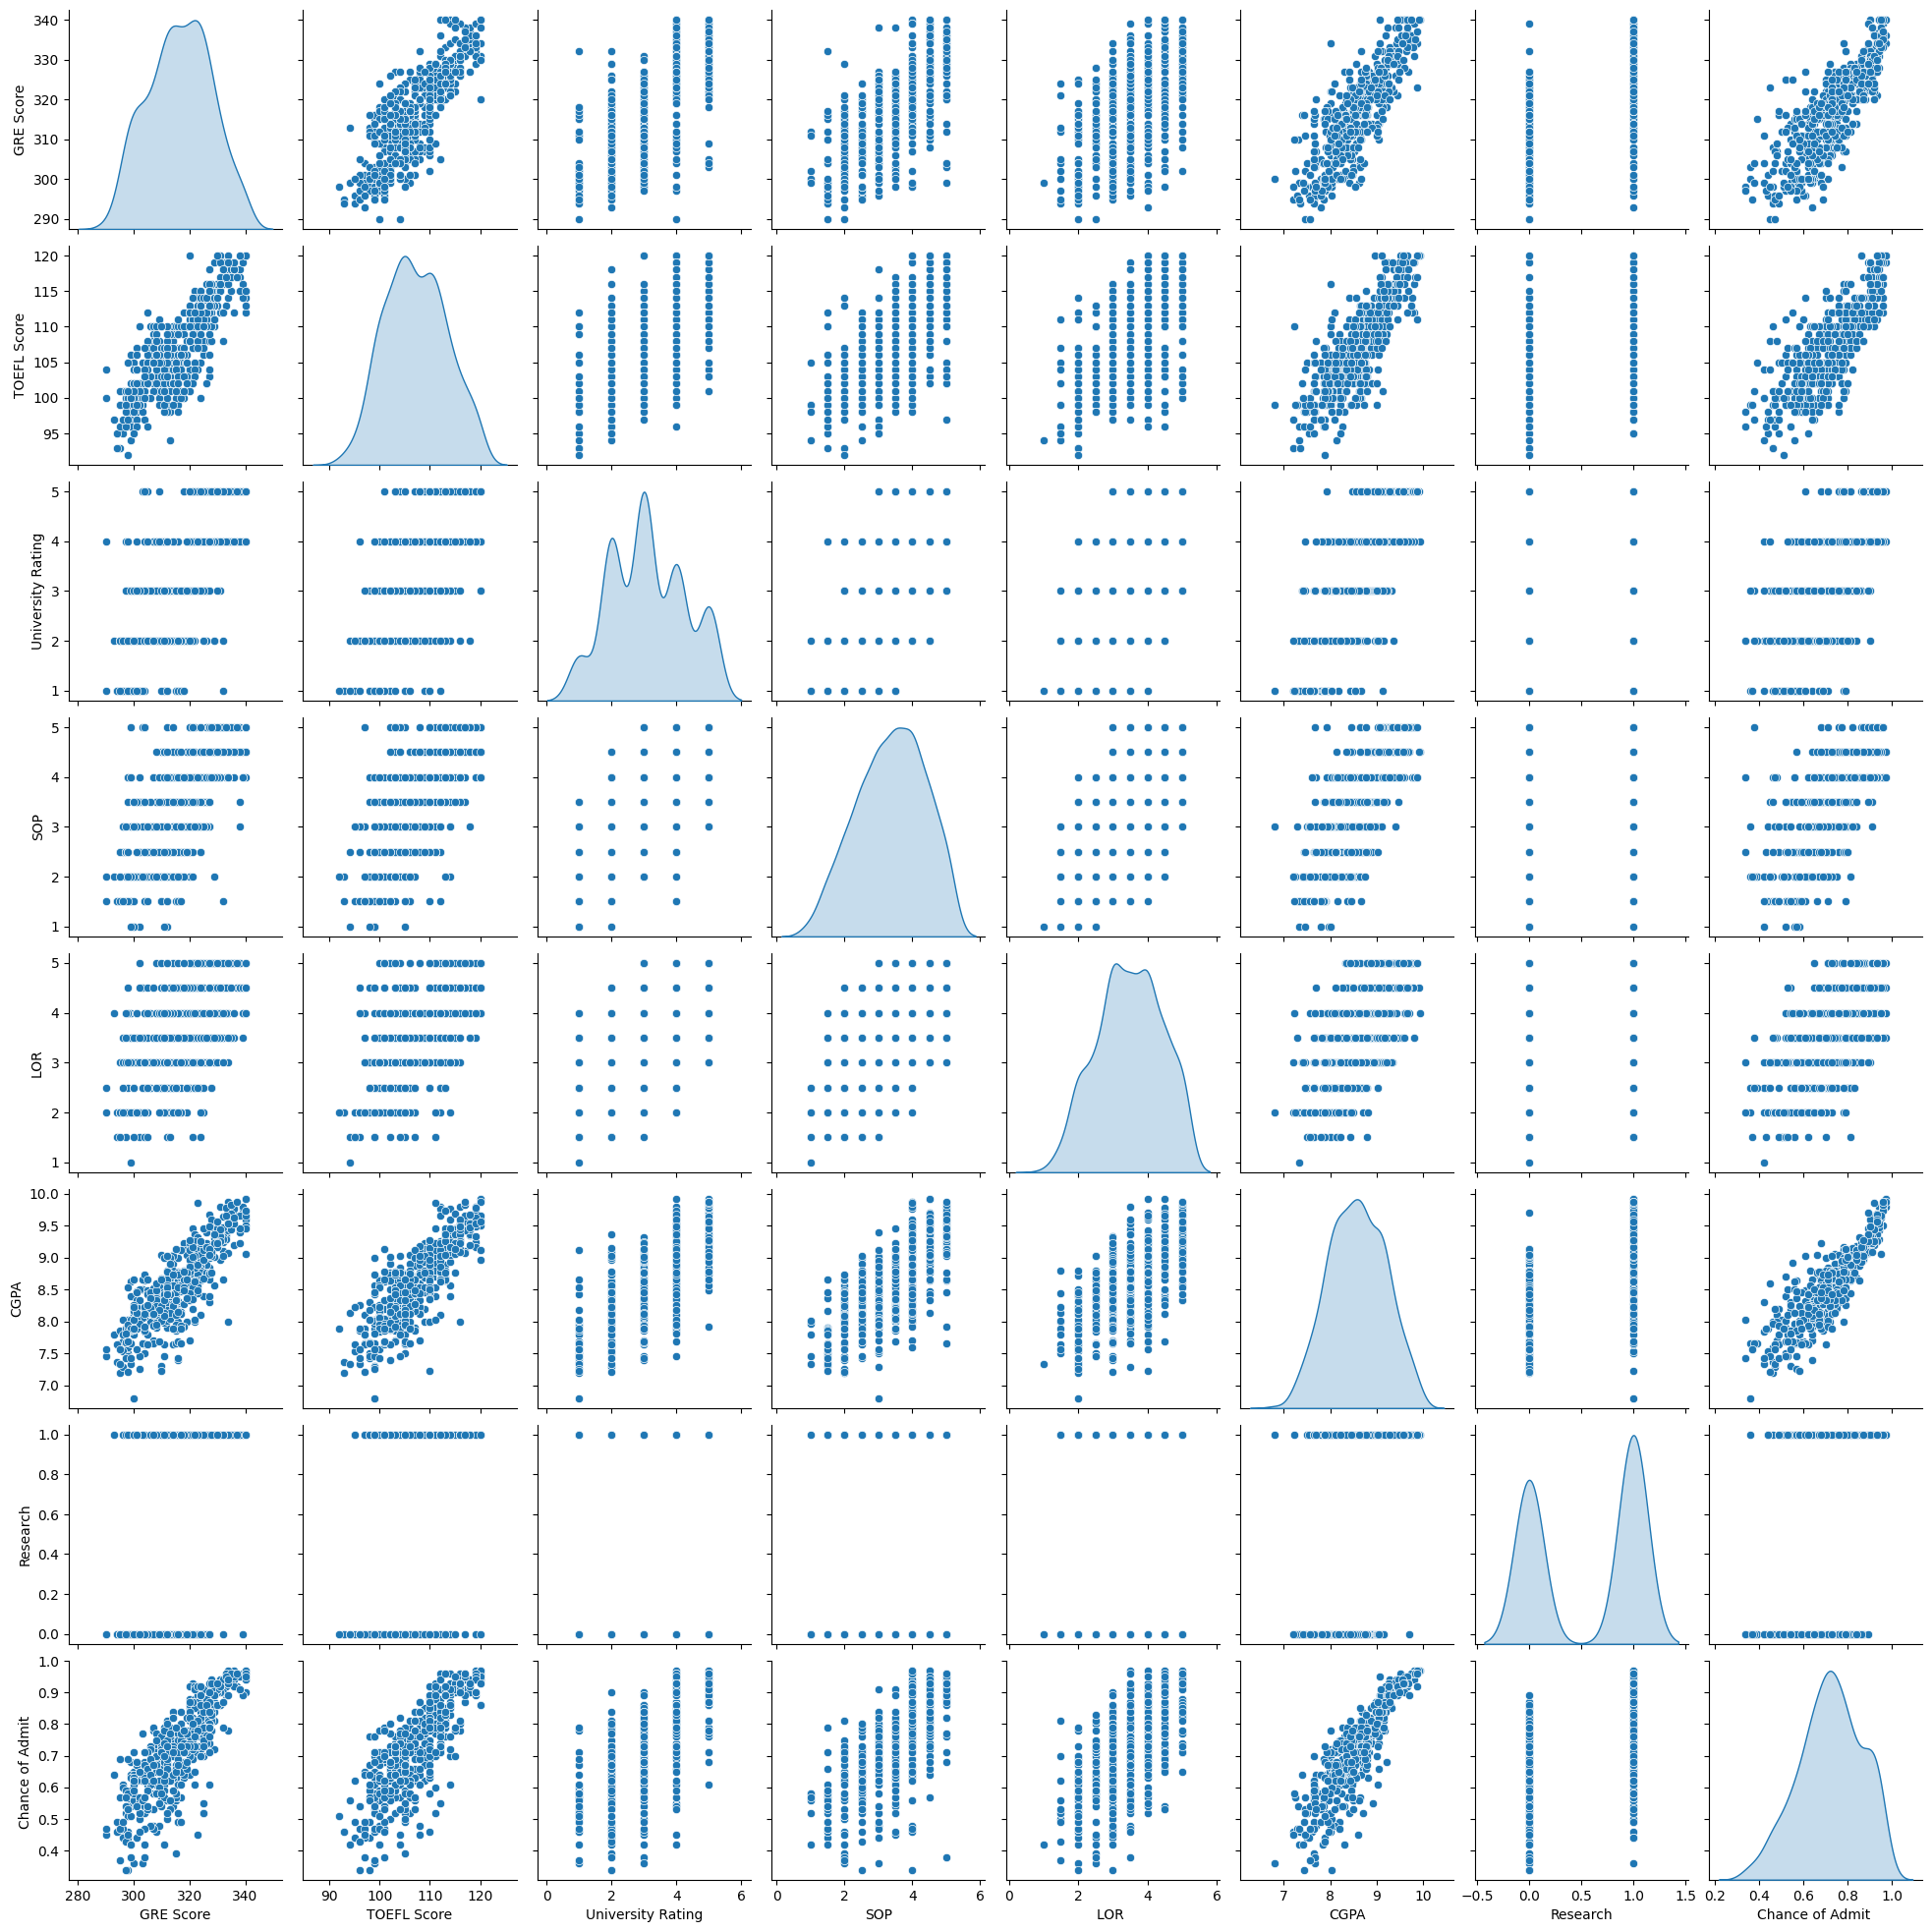

In [10]:
sns.pairplot(df, diag_kind='kde')

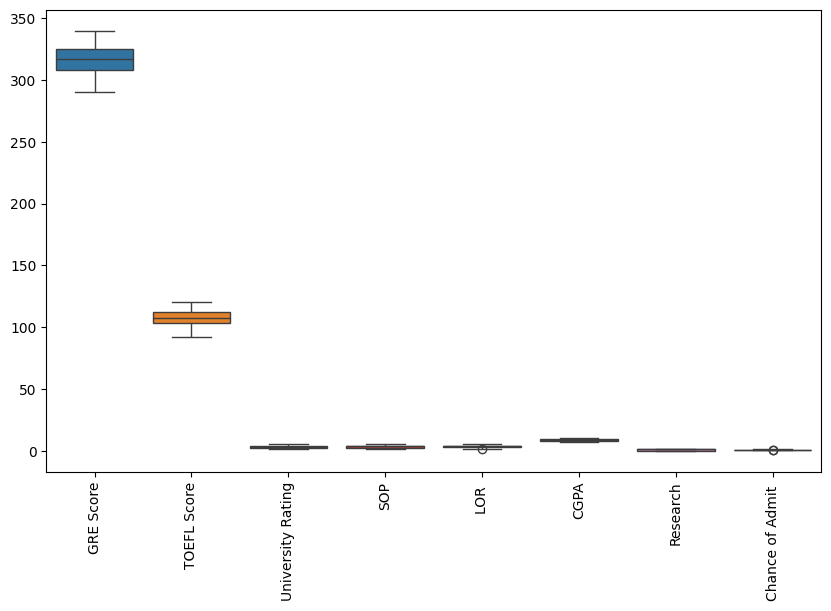

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

##### Skewness and kurtosis

In [12]:
skewness = df.skew()
print("Skewness:\n", skewness)

Skewness:
 GRE Score           -0.039842
TOEFL Score          0.095601
University Rating    0.090295
SOP                 -0.228972
LOR                 -0.145290
CGPA                -0.026613
Research            -0.242475
Chance of Admit     -0.289966
dtype: float64


In [13]:
kurtosis = df.kurt()
print("Kurtosis:\n", kurtosis)

Kurtosis:
 GRE Score           -0.711064
TOEFL Score         -0.653245
University Rating   -0.810080
SOP                 -0.705717
LOR                 -0.745749
CGPA                -0.561278
Research            -1.949018
Chance of Admit     -0.454682
dtype: float64


In [14]:
corr_matrix = df.corr()
corr_matrix

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


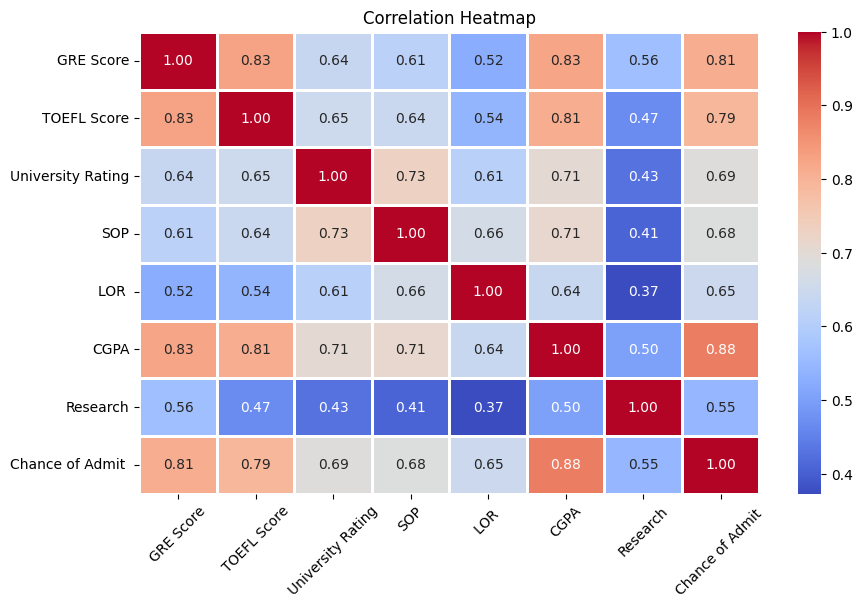

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.show()

### 🕵🏽‍♂️ Correlation:
* **Significant Correlation**: 
     - The correlation between CGPA and Chance of Admit is 0.882, which is the highest among all factors. This suggests that CGPA is the most significant predictor of the chance of admission.
* **Strong Correlation**: 
    - *GRE Score*: The correlation between GRE Score and Chance of Admit is 0.810, indicating a strong positive relationship. Higher GRE scores are strongly associated with a higher chance of admission.
    - *TOEFL Score*: The correlation between TOEFL Score and Chance of Admit is 0.792, also showing a strong positive relationship. Higher TOEFL scores are strongly associated with a higher chance of admission.
* **Moderate Correlation**:
    - *University Rating*: The correlation is 0.690, indicating a moderate positive relationship. Higher university ratings are moderately associated with a higher chance of admission.
    - *SOP (Statement of Purpose)*: The correlation is 0.684, also indicating a moderate positive relationship. A stronger SOP is moderately associated with a higher chance of admission.
    - *LOR (Letter of Recommendation)*: The correlation is 0.645, indicating a moderate positive relationship. Stronger LORs are moderately associated with a higher chance of admission.
    - *Research*: The correlation is 0.546, which is lower compared to other factors but still shows a moderate positive relationship. Having research experience is moderately associated with a higher chance of admission.


### 🤼 Correlation among independent variables

In [16]:
independent_vars = df.drop(columns=['Chance of Admit '])
corr_matrix_independent = independent_vars.corr()
corr_matrix_independent

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000


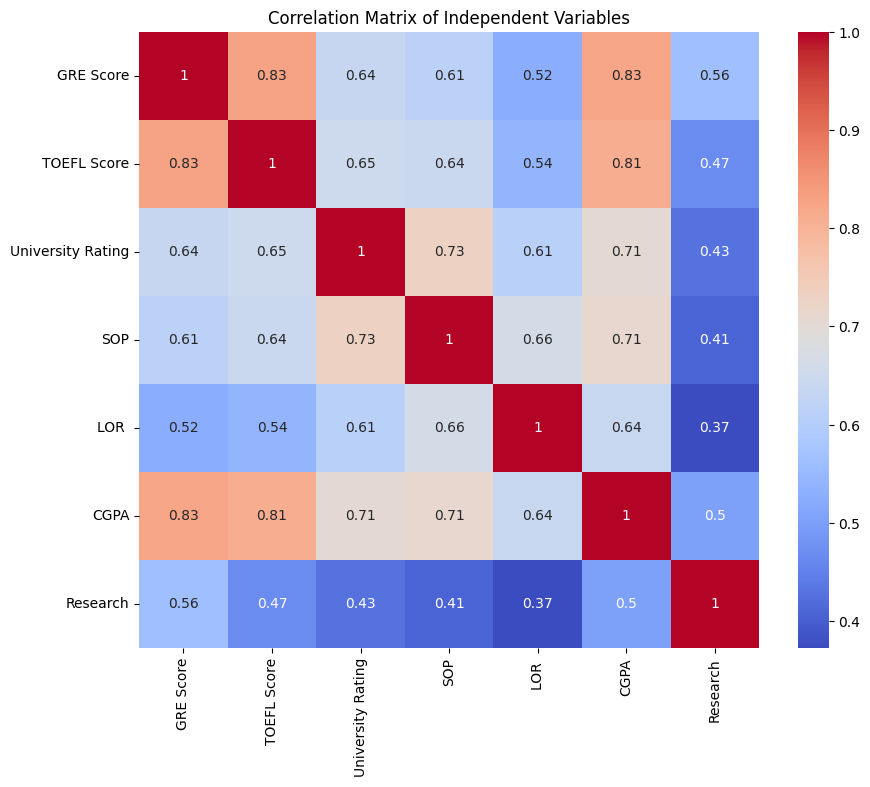

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_independent, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Independent Variables')
plt.show()

### 🕵🏽‍♂️ Key Insights:
**High Correlations (Potential Multicollinearity)**

* *GRE Score and TOEFL Score (0.827)*: High correlation indicates that these two variables are closely related. Including both in the model might cause multicollinearity issues.
* *GRE Score and CGPA (0.826)*: Another high correlation, suggesting that students with higher GRE scores also tend to have higher CGPA.
* *TOEFL Score and CGPA (0.811)*: High correlation, indicating that students with higher TOEFL scores also tend to have higher CGPA.
* *University Rating and SOP (0.728)*: Strong correlation, suggesting that higher university ratings are associated with higher SOP scores.

**Moderate Correlations**
* *University Rating and CGPA (0.705)*: Moderate correlation, indicating that higher university ratings are associated with higher CGPA.
* *SOP and CGPA (0.712)*: Moderate correlation, suggesting that higher SOP scores are associated with higher CGPA.
* *LOR and SOP (0.664)*: Moderate correlation, indicating that higher LOR scores are associated with higher SOP scores.
* *LOR and CGPA (0.637)*: Moderate correlation, suggesting that higher LOR scores are associated with higher CGPA.

**Lower Correlations**
* *Research and other variables*: Research has lower correlations with other variables, indicating that it provides unique information not captured by other variables.

### 📈 Linear Regression (Statsmodel)

In [18]:
X = df.drop(columns=['Chance of Admit '])
y = df['Chance of Admit ']

# Adding a constant to the model
X = sm.add_constant(X)

# Model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     324.4
Date:                Sat, 14 Sep 2024   Prob (F-statistic):          8.21e-180
Time:                        19:32:17   Log-Likelihood:                 701.38
No. Observations:                 500   AIC:                            -1387.
Df Residuals:                     492   BIC:                            -1353.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2757      0.10

### 🕵🏽‍♂️ Key Insights:
* **R-squared: 0.822**
This indicates that approximately 82.2% of the variance in the dependent variable (Chance of Admit) is explained by the independent variables in the model.

* **Adjusted R-squared: 0.819**
This value is slightly lower than the R-squared, which accounts for the number of predictors in the model. It indicates that the model is well-fitted.

* **F-statistic: 324.4**
A high F-statistic value indicates that the model is statistically significant.

* **Prob (F-statistic): 8.21e-180**
The p-value for the F-statistic is extremely low, suggesting that the overall model is significant.

### 🕵🏽‍♂️ Interpretation:
**Significant Predictors:**

GRE Score, TOEFL Score, LOR, CGPA, and Research are significant predictors of the Chance of Admit. These variables have p-values less than 0.05, indicating that they have a statistically significant impact on the dependent variable.

**Non-Significant Predictors:**

University Rating and SOP are not statistically significant predictors (p > 0.05). This suggests that these variables do not have a significant impact on the Chance of Admit when other variables are held constant.

**Model Fit:**

The high R-squared and Adjusted R-squared values indicate that the model explains a substantial portion of the variance in the Chance of Admit.

- - - -

### 💯 Assumptions of the linear regression model

##### 1️⃣ Mean of Residuals

In [19]:
# Calculate residuals
residuals = model.resid

# Check the mean of residuals
mean_residuals = residuals.mean()
print(f'Mean of residuals: {mean_residuals}')

Mean of residuals: 9.15711950710829e-16


**✅ The Mean of Residuals**

The residuals (errors) have a mean close to zero

##### 2️⃣ Linearity of Variables

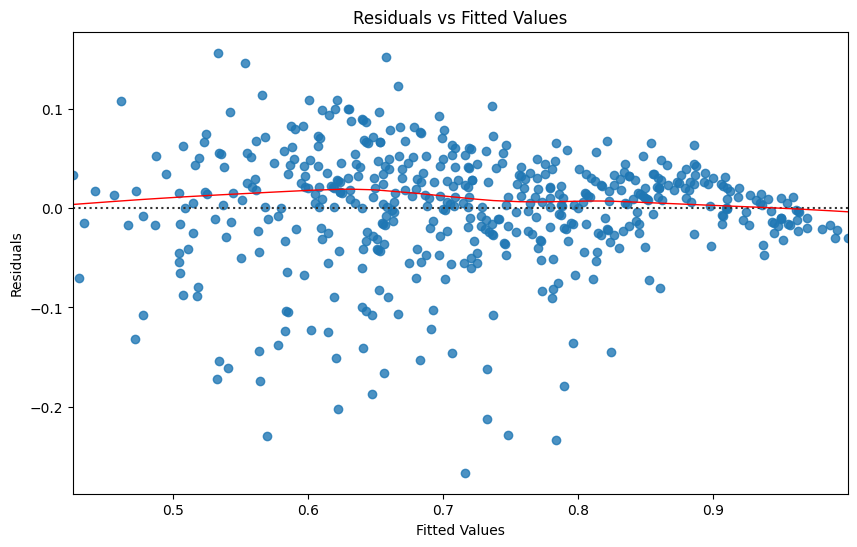

In [20]:
plt.figure(figsize=(10, 6))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

**✅ Linearity of Variables**

No Pattern in the Residual Plot

##### 3️⃣ Multicollinearity Check by VIF Score

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

             feature          VIF
0              const  1511.495830
1          GRE Score     4.464249
2        TOEFL Score     3.904213
3  University Rating     2.621036
4                SOP     2.835210
5               LOR      2.033555
6               CGPA     4.777992
7           Research     1.494008


### 🕵🏽‍♂️ Key Insights:

* **Intercept (const):**
The extremely high VIF for the intercept is expected and typically not a concern. It indicates that the intercept term is highly correlated with the independent variables, which is normal in regression models.

* **GRE Score (4.464) and CGPA (4.778):**
These values are below 5, indicating low to moderate multicollinearity. However, they are the highest among your predictors, suggesting some level of multicollinearity that might be worth monitoring.

* **TOEFL Score (3.904):**
This value is also below 5, indicating low to moderate multicollinearity.
University Rating (2.621), SOP (2.835), LOR (2.034), and Research (1.494):

#### ✅ These values are well below 5, indicating low multicollinearity.

### 💡 Recommendations:
Given that none of your VIF values exceed 5, multicollinearity is not a significant issue in your model. However we can try techniques like Ridge Regression or Lasso Regression can help mitigate the effects of multicollinearity by adding a penalty to the regression coefficients.

##### 4️⃣ Homoscedasticity

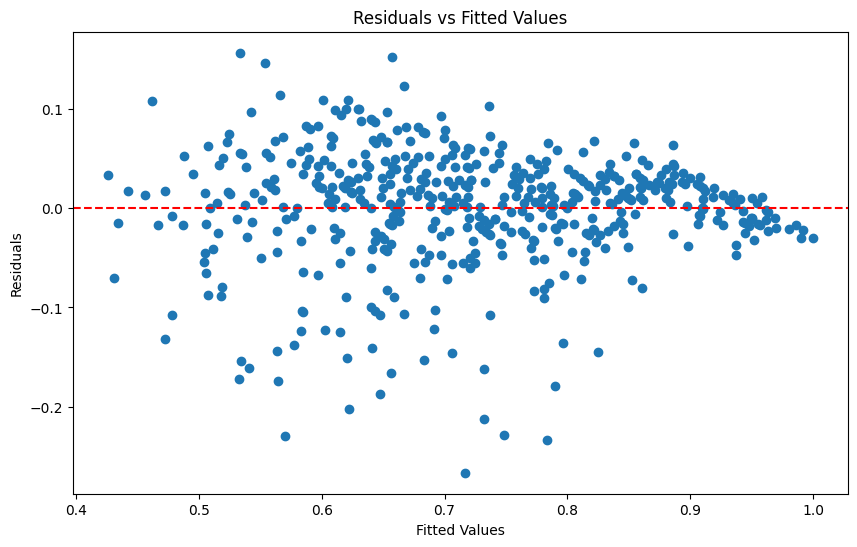

In [22]:
# Plot residuals vs fitted values to check for homoscedasticity
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

####  ✅ Homoscedasticity
The residuals have constant variance at every level of the independent variables.

##### 5️⃣ Normality of Residuals

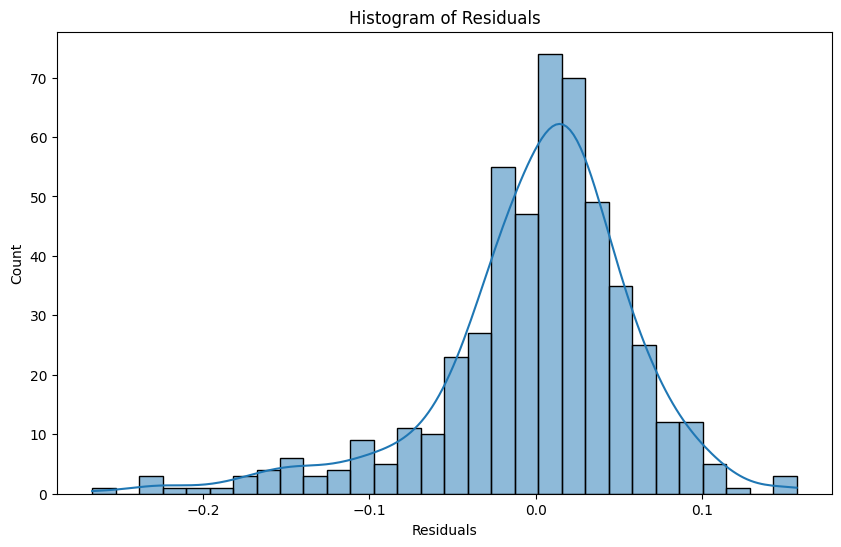

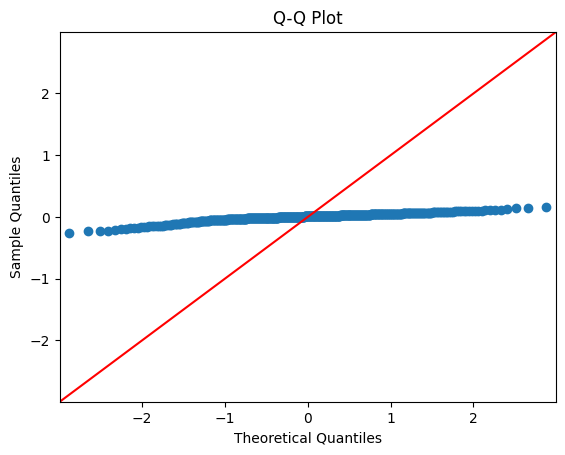

In [23]:
# Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()

# Q-Q plot
import statsmodels.api as sm

sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot')
plt.show()


####  ✅ Normality of Residuals
The residuals is normally distributed

- - - -

### 📉 Lasso Regression

In [24]:
X = df.drop(columns=['Chance of Admit '])
y = df['Chance of Admit ']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create interaction terms and polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
X_poly = poly.fit_transform(X_scaled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train the Lasso Regression model
lasso = Lasso(alpha=0.01, max_iter=10000)
lasso.fit(X_train, y_train)

# Make predictions
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

# Calculate performance metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = 1 - (1 - r2_train) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)

mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
r2_test = r2_score(y_test, y_test_pred)
adj_r2_test = 1 - (1 - r2_test) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

# Print Metrics
print(f'Training MAE: {mae_train}')
print(f'Training RMSE: {rmse_train}')
print(f'Training R²: {r2_train}')
print(f'Training Adjusted R²: {adj_r2_train}')

print(f'Testing MAE: {mae_test}')
print(f'Testing RMSE: {rmse_test}')
print(f'Testing R²: {r2_test}')
print(f'Testing Adjusted R²: {adj_r2_test}')


Training MAE: 0.04367607964233535
Training RMSE: 0.060766947434233165
Training R²: 0.8126411415003971
Training Adjusted R²: 0.7946258666446661
Testing MAE: 0.04260101378338029
Testing RMSE: 0.061545226132572795
Testing R²: 0.814776779476307
Testing Adjusted R²: 0.7134828307524124


- - - -

### 🕶️ Ridge Regression

In [25]:
X = df.drop(columns=['Chance of Admit '])
y = df['Chance of Admit ']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and fit the Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predict on the test set
y_pred = ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.0037057743637988107
R-squared: 0.8187885396675398


## 📊 Comparison and Insights
* **R-squared**

    *OLS Regression*: 0.822

    *Ridge Regression*: 0.818

    The R-squared value for the Ridge Regression model is slightly lower than that of the OLS model. This is expected because Ridge Regression introduces a penalty to the coefficients, which can slightly reduce the model's explanatory power but helps in reducing overfitting and improving generalization.

* **Mean Squared Error (MSE)**

    *Ridge Regression*: 0.00372232231995397

    The MSE for the Ridge Regression model indicates the average squared difference between the observed actual outcomes and the outcomes predicted by the model. Since we don't have the MSE for the OLS model directly from the summary, we can infer that the Ridge Regression model's MSE is quite low, suggesting good predictive performance.

In [27]:
# Predictions
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

# Training Metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = 1 - (1 - r2_train) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)

# Testing Metrics
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
r2_test = r2_score(y_test, y_test_pred)
adj_r2_test = 1 - (1 - r2_test) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

# Print Metrics
print(f'Training MAE: {mae_train}')
print(f'Training RMSE: {rmse_train}')
print(f'Training R²: {r2_train}')
print(f'Training Adjusted R²: {adj_r2_train}')

print(f'Testing MAE: {mae_test}')
print(f'Testing RMSE: {rmse_test}')
print(f'Testing R²: {r2_test}')
print(f'Testing Adjusted R²: {adj_r2_test}')

Training MAE: 0.042529184932157786
Training RMSE: 0.05938547134033834
Training R²: 0.8210631423824621
Training Adjusted R²: 0.8178678413535776
Testing MAE: 0.042747194746281504
Testing RMSE: 0.060875071776539294
Testing R²: 0.8187885396675398
Testing Adjusted R²: 0.8050007111639831


#### 💡 Model Performance Insights
* **Training Performance**
    - **Mean Absolute Error (MAE): 0.0425**
    The average magnitude of errors in the training set is approximately 0.0425. This indicates that, on average, the model's predictions deviate from the actual values by about 0.0425 units.
    - **Root Mean Squared Error (RMSE): 0.0593**
    The RMSE of 0.0593 suggests that the model's predictions have an average squared error of about 0.0593 units. This metric is slightly more sensitive to large errors compared to MAE.
    - **R-squared (R²): 0.821**
    An R² of 0.8210 indicates that 82.10% of the variance in the training data is explained by the model. This suggests a strong fit to the training data.
    - **Adjusted R-squared (Adj R²): 0.8173**
    The Adjusted R² of 0.8173 accounts for the number of predictors in the model. This value is slightly lower than R², indicating a good fit while considering model complexity.
* **Testing Performance**
    - **Mean Absolute Error (MAE): 0.0427**
    The average magnitude of errors in the test set is approximately 0.0427. This is very close to the training MAE, suggesting consistent performance.
    - **Root Mean Squared Error (RMSE): 0.0608**
    The RMSE of 0.0608 on the test set is also very close to the training RMSE, indicating that the model's predictions are similarly accurate on unseen data.
    - **R-squared (R²): 0.8187**
    An R² of 0.8281 on the test set indicates that 81.87% of the variance in the test data is explained by the model. This is slightly higher than the training R², suggesting good generalization.
    - **Adjusted R-squared (Adj R²): 0.8050**
    The Adjusted R² of 0.8050 on the test set is also very close to the training Adjusted R², further indicating that the model generalizes well.

**Key Insights**

* **Consistent Performance:**
The close values of MAE and RMSE between the training and test sets indicate that the model performs consistently on both seen and unseen data. This suggests that the model is not overfitting the training data.
* **Strong Fit:**
The high R² and Adjusted R² values for both the training and test sets indicate that the model explains a substantial portion of the variance in the data. This reflects a strong fit and good predictive power.
* **Generalization:**
The slight improvement in R² from the training set to the test set suggests that the model generalizes well to new data. This is a positive indication of the model's robustness.

**Recommendations**
* **Model Validation:**
Continue to validate the model using cross-validation techniques to ensure its robustness across different subsets of the data.
* **Feature Engineering:**
Explore additional feature engineering techniques to potentially enhance the model's performance further.

 - - - -

#### 🧰 Actionable Insights & Recommendations

**Comments on Significance of Predictor Variables**

**GRE Score, TOEFL Score, CGPA:**

These academic performance indicators are likely to be significant predictors of admission chances. High VIF values for these variables suggest multicollinearity, indicating that they may provide similar information. However, their significance in predicting admission chances should not be overlooked.

*Recommendation:* Consider retaining these variables but monitor for multicollinearity. Regularization techniques like Ridge or Lasso Regression can help manage this issue.

**University Rating, SOP, LOR:**

These qualitative measures reflect the applicant's overall profile and institutional reputation. They are moderately correlated with admission chances.

*Recommendation:* Keep these variables as they provide valuable context about the applicant's profile beyond just academic scores.

**Research:**

The presence of research experience is a significant predictor, as it indicates the applicant's engagement in academic or professional projects.

*Recommendation:* Retain this variable as it adds a unique dimension to the applicant's profile.

- - - - - 

**Comments on Additional Data Sources for Model Improvement**

**Extracurricular Activities:**

Including data on extracurricular activities can provide a more holistic view of the applicant's profile.

**Demographic Information:**

Including demographic variables such as age, gender, and geographical location can help in understanding diverse applicant profiles.

*Recommendation:* Collect and include demographic data to ensure the model accounts for diversity and inclusivity.

- - - - - 

**Model Implementation in the Real World**

**Integration with Admission Systems:**

Implement the model within the university's admission system to provide real-time predictions and insights.

*Recommendation:* Develop an API that integrates with existing admission platforms to automate the prediction process.

**User-Friendly Dashboards:**

Create dashboards for admission officers to visualize model predictions and key metrics.

*Recommendation:* Use tools like Tableau or Power BI to develop interactive dashboards that display applicant scores, predicted admission chances, and other relevant metrics.

**Periodic Model Updates:**

Regularly update the model with new data to ensure its accuracy and relevance.

*Recommendation:* Establish a process for periodic data collection and model retraining to keep the model up-to-date.

**Potential Business Benefits from Improving the Model**

**Enhanced Decision-Making:**

A robust predictive model can assist admission officers in making more informed and objective decisions.

*Benefit:* Reduces bias and increases the efficiency of the admission process.

**Increased Admission Yield:**

By accurately predicting admission chances, the university can target efforts to improve yield rates.

*Benefit:* Higher yield rates lead to better resource planning and allocation.


- - - -